In [1]:
# Base Imports
import os
import sys
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

# Model Imports
import category_encoders as ce
import xgboost as xgb
import sklearn as sk

In [2]:
# Loading the data

df_train_base = pd.read_csv('data/train.csv')
df_test_base = pd.read_csv('data/test.csv')

In [3]:
# Encoding Functions

def circular_encoder(df):
    # Encode dow and hour as sin and cos
    
    df['dow_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 6.0)
    df['dow_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 6.0)
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 23.0)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 23.0)
    df.drop(['day_of_week', 'hour'], axis=1, inplace=True)
    
    return df

def one_hot_encoder(df):
    # Encode PULocationID and DOLocationID as one-hot
    
    encoder = ce.OneHotEncoder(cols=['PULocationID', 'DOLocationID'], use_cat_names=True)
    df = encoder.fit_transform(df)
    
    return df

def target_encoder(df, target_column):
    # Encode PULocationID and DOLocationID as target
    
    encoder = ce.TargetEncoder(cols=['PULocationID', 'DOLocationID'])
    df = encoder.fit_transform(df, df[target_column])
    
    return df

In [4]:
# Models based only on circluar encoding

def total_amount_model(df_train, df_test):

    df_train = circular_encoder(df_train)
    df_test = circular_encoder(df_test)
    
    X_train= df_train.drop(['travel_time', 'total_amount'], axis=1)
    y_train = df_train['total_amount']
    
    X_test = df_test.drop(['travel_time', 'total_amount'], axis=1)
    y_test = df_test['total_amount']
    
    model = xgb.XGBRegressor()
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    
    print('Training time for total amount model:', end - start)
    
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    plt.scatter(y_train, y_train_pred, alpha=0.1)
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.title('Train')
    plt.show()
    
    plt.scatter(y_test, y_test_pred, alpha=0.1)
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.title('Test')
    plt.show()
    
    

def travel_time_model(df_train, df_test):

    df_train = circular_encoder(df_train)
    df_test = circular_encoder(df_test)
    
    X_train= df_train.drop(['travel_time', 'total_amount'], axis=1)
    y_train = df_train['travel_time']
    
    X_test = df_test.drop(['travel_time', 'total_amount'], axis=1)
    y_test = df_test['travel_time']
    
    model = xgb.XGBRegressor()
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    
    print('Training time for travel time model:', end - start)
    
    

In [ ]:
# Print stats of the model

def print_stats(model, df_train, df_test, amount, one_hot):
    if one_hot:
        df_train = circular_encoder(df_train)
        # df_train = one_hot_encoder(df_train)
        df_test = circular_encoder(df_test)
        # df_test = one_hot_encoder(df_test)
    else:
        df_train = circular_encoder(df_train)
        df_train = target_encoder(df_train, amount)
        df_test = circular_encoder(df_test)
        df_test = target_encoder(df_test, amount)
        
    if amount:
        target = 'total_amount'
    else:
        target = 'travel_time'
        
    X_train = df_train.drop(['travel_time', 'total_amount'], axis=1)
    y_train = df_train[target]
    X_test = df_test.drop(['travel_time', 'total_amount'], axis=1)
    y_test = df_test[target]
    
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))

Training time for total amount model: 54.30661630630493
Train R^2: 0.8381334494340346
Test R^2: 0.7616270728217012


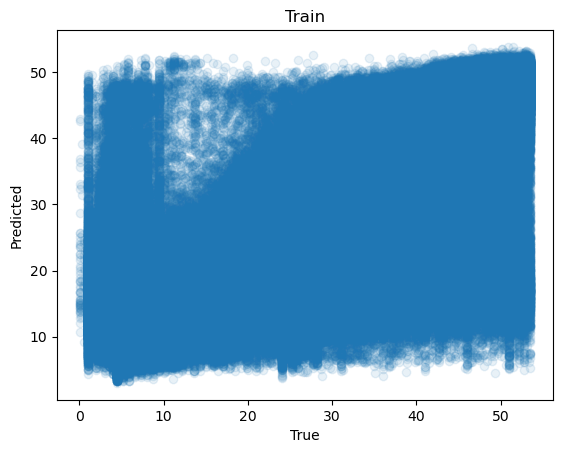

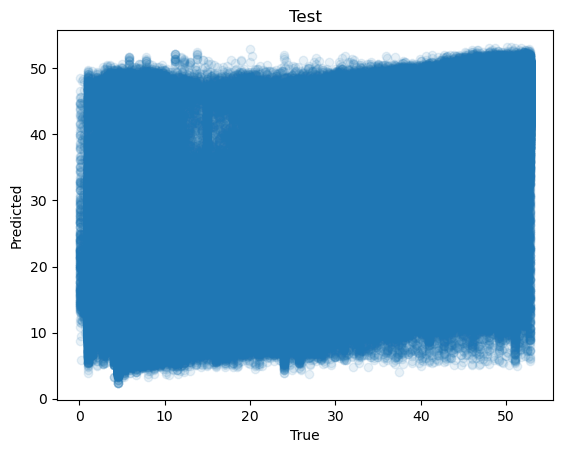

In [7]:
# Running models

# Copies of the data
df_train_copy = df_train_base.copy()
df_test_copy = df_test_base.copy()

total_amount_model(df_train_copy, df_test_copy)